In [4]:


from models.AnalysisTree import generate_analysis_treenode
import pandas as pd
import numpy as np

save_path = 'seqFISH3000'
cell_type_df = pd.read_csv(
        f"{save_path}/map_results.csv",
        index_col=0)
print(cell_type_df)
# generate hierarchical tree
root, leaf_node_list = generate_analysis_treenode(cell_type_df.columns.tolist(), np.array(cell_type_df.values))
print(root)


    Olig_0_0_0_0  Olig_0_0_0_1  Olig_0_0_0_10  Olig_0_0_0_100  Olig_0_0_0_101  \
0   3.501234e-07  3.600846e-07   4.274239e-07    4.004756e-07    4.027794e-07   
1   3.257382e-07  3.222299e-07   3.275607e-07    3.098854e-07    3.144546e-07   
2   2.893596e-07  2.780317e-07   2.800761e-07    2.937659e-07    3.322470e-07   
3   2.703758e-07  2.887691e-07   2.692723e-07    2.689736e-07    2.893762e-07   
4   2.186998e-07  2.111610e-07   2.190456e-07    2.281110e-07    2.222856e-07   
..           ...           ...            ...             ...             ...   
66  5.498379e-06  4.818993e-06   5.757078e-06    4.019264e-06    4.701515e-06   
67  4.434631e-06  4.448635e-06   5.582931e-06    4.125894e-06    4.242161e-06   
68  3.770513e-07  3.672226e-07   3.634147e-07    3.590075e-07    3.531640e-07   
69  6.634106e-07  6.292111e-07   6.976379e-07    6.096389e-07    4.959672e-07   
70  2.410595e-07  2.508112e-07   2.528461e-07    2.518433e-07    2.264307e-07   

    Olig_0_0_0_102  Olig_0_

Data matrix:
(71, 3000)
[[0 0 0 ... 0 0 0]
 [0 2 2 ... 2 0 2]
 [0 0 0 ... 0 0 1]
 ...
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
Data obs:
    cell_id  astrocytes      Olig  endo.mural   iNeuron   eNeuron  microglia  \
0         0    0.000000  0.000000    1.000000  0.000000  0.000000   0.000000   
1         1    0.333333  0.000000    0.333333  0.333333  0.000000   0.000000   
2         2    0.250000  0.250000    0.250000  0.000000  0.000000   0.250000   
3         3    0.333333  0.000000    0.000000  0.333333  0.000000   0.333333   
4         7    0.000000  0.000000    0.000000  0.000000  1.000000   0.000000   
..      ...         ...       ...         ...       ...       ...        ...   
66      102    0.083333  0.333333    0.083333  0.000000  0.500000   0.000000   
67      103    0.083333  0.416667    0.083333  0.000000  0.416667   0.000000   
68      104    1.000000  0.000000    0.000000  0.000000  0.000000   0.000000   
69      109    0.500000  0.500000    0.000000 

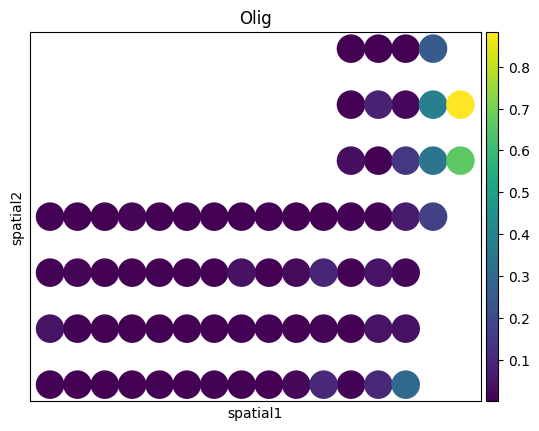

astrocytes


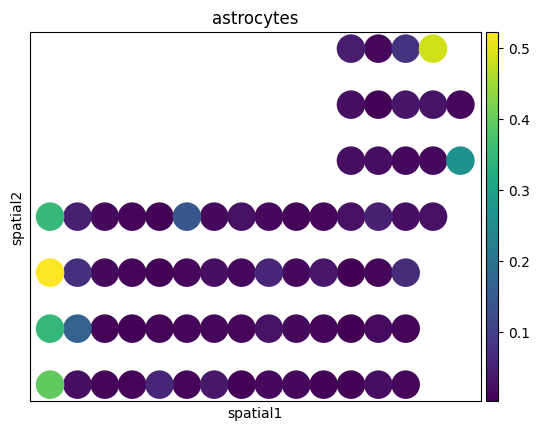

eNeuron


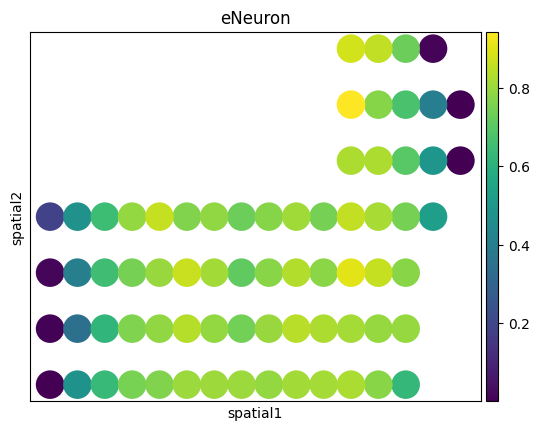

endo.mural


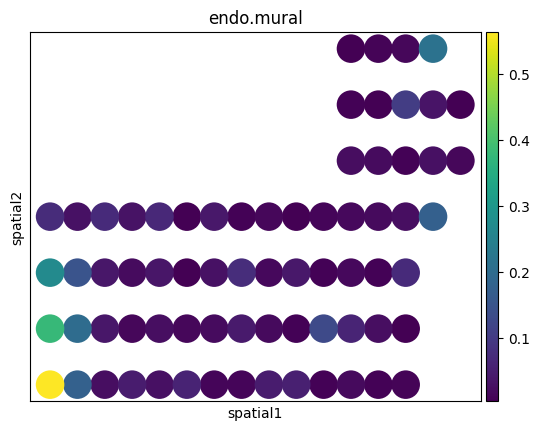

iNeuron


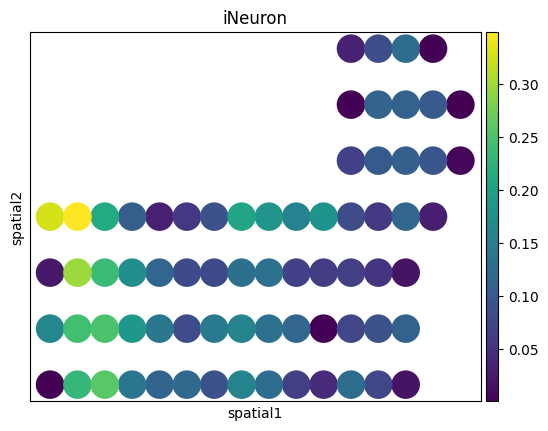

microglia


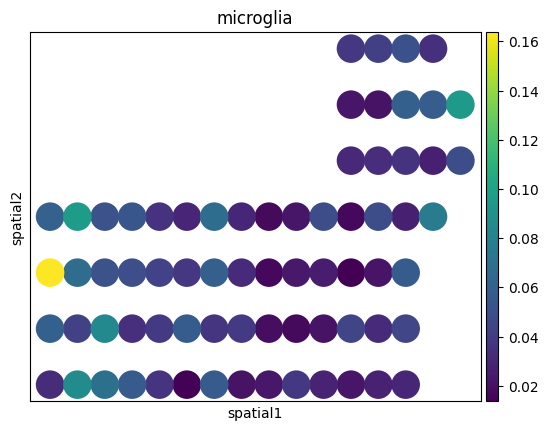

In [17]:
# visualize cell type level heatmap
from models.utils import check_anndata
from models.AnalysisTree import get_child_node
import scanpy as sc
import os

# if not os.path.exists(f'figures/spatial{save_path}/subtype'):
#     os.mkdir(f'/figures/spatial{save_path}/subtype')
st_target_path = f"../datasets/seqFISH//spatial/seqFISH_st3000.h5ad"
st_rna_adata = check_anndata(
        st_target_path, True)
# current child node list
child_node_list = get_child_node([root])
# level_1
for c_node in child_node_list:
    print(c_node.node_name)
    # visualizing cell type heatmap
    st_rna_adata.obs[c_node.node_name] = c_node.calculate_weights()
    sc.pl.embedding(st_rna_adata,
                    basis='spatial',
                    color=c_node.node_name,
                    show=True,
                    save=f'{c_node.node_name}_subtype.png',)
# next_level level_2
# child_node_list_2 = get_child_node(child_node_list)
# for c_node in child_node_list_2:
#     print(c_node.node_name)


Olig_0


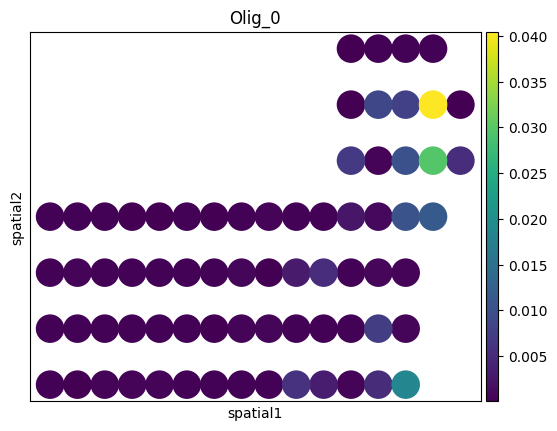

Olig_1


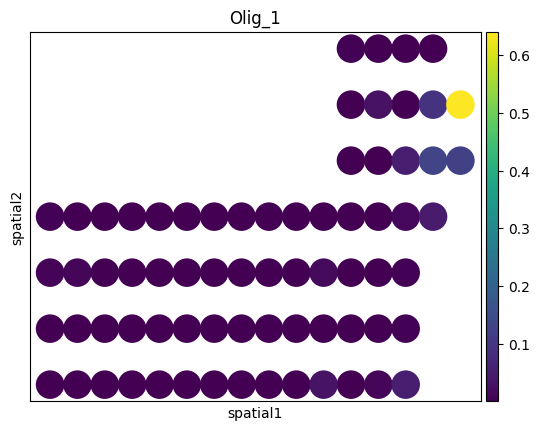

Olig_2


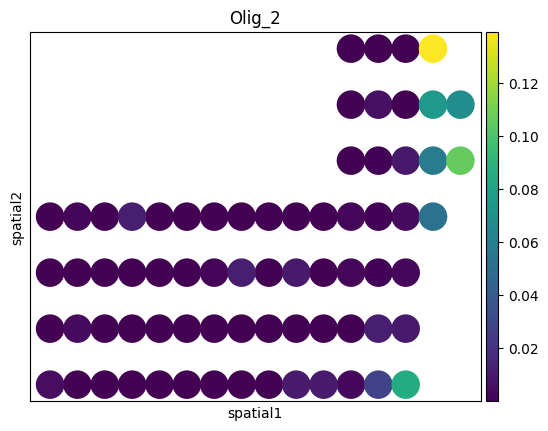

Olig_3


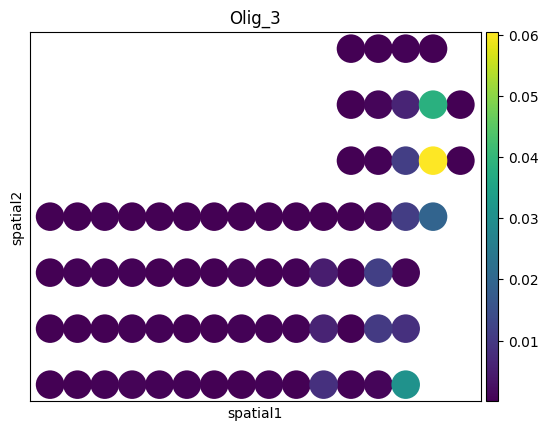

Olig_4


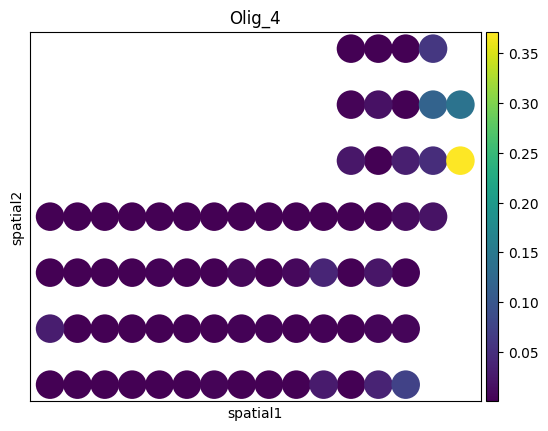

Olig_5


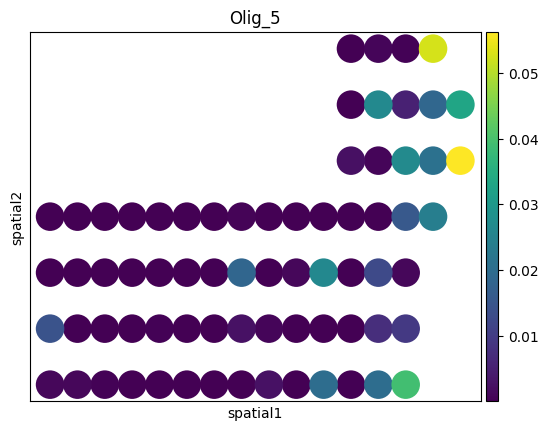

eNeuron_0


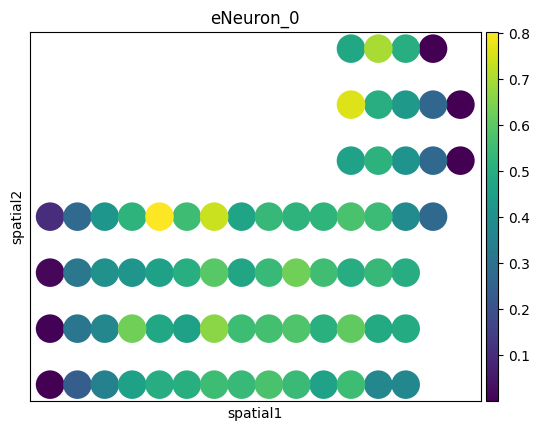

eNeuron_1


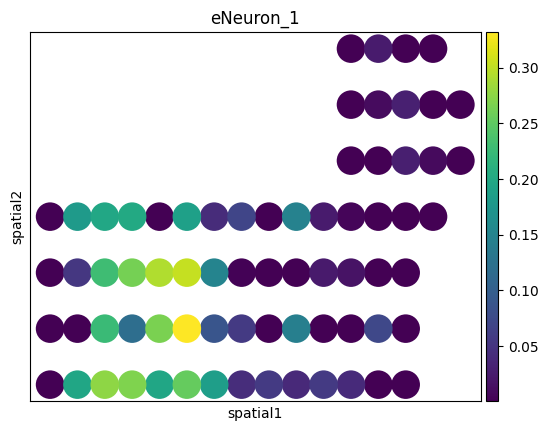

eNeuron_2


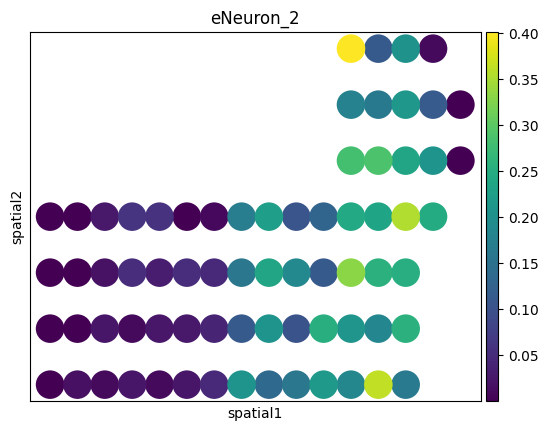

eNeuron_3


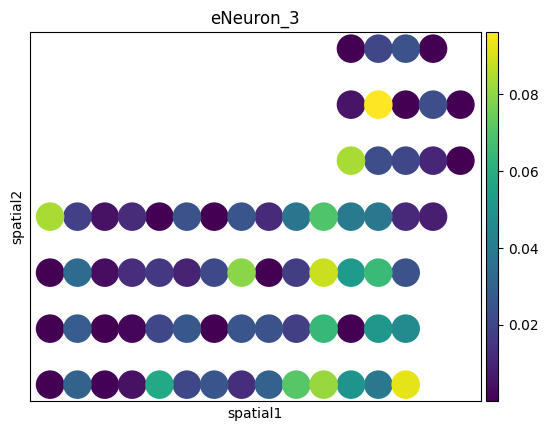

endo.mural_0


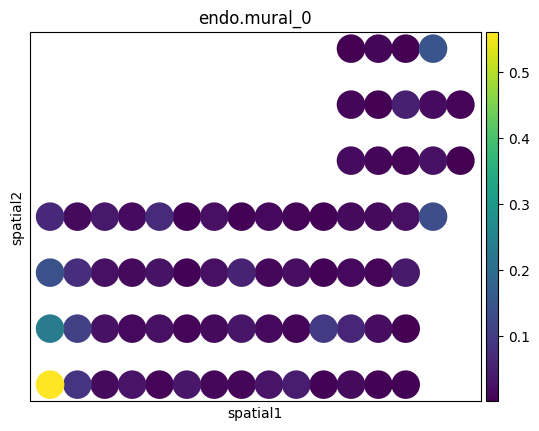

endo.mural_1


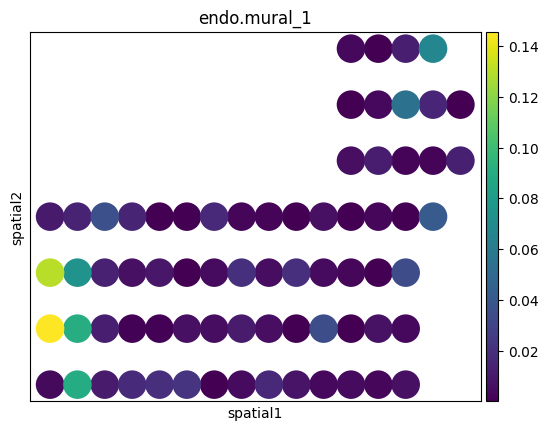

iNeuron_0


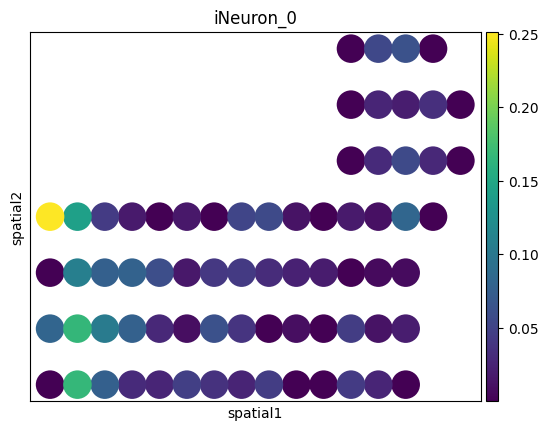

iNeuron_1


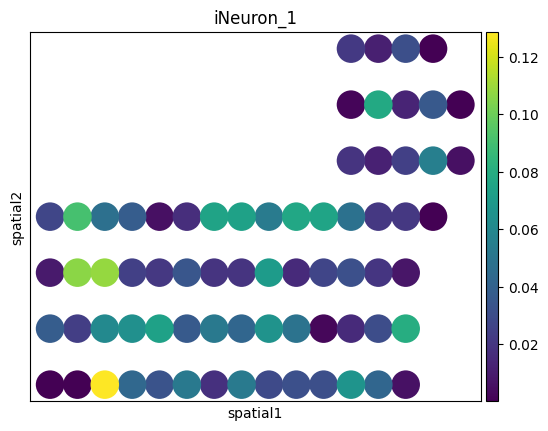

iNeuron_2


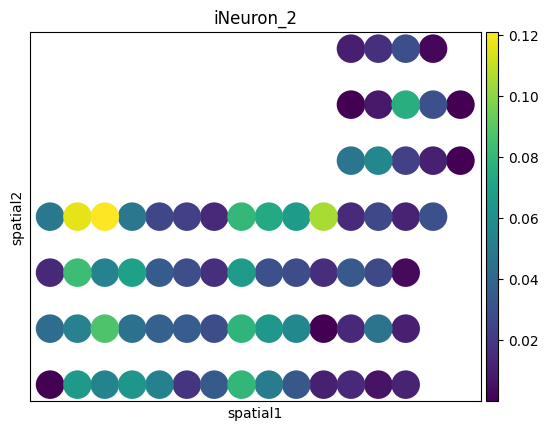

In [18]:
# visualize cell subtype level heatmap
child_node_list_2 = get_child_node(child_node_list)
for c_node in child_node_list_2:
    if not c_node.is_leaf:
        print(c_node.node_name)
        # visualizing cell type heatmap, only when current node is not leaf node
        st_rna_adata.obs[c_node.node_name] = c_node.calculate_weights()
        sc.pl.embedding(st_rna_adata,
                        basis='spatial',
                        color=c_node.node_name,
                        show=True,
                        save=f'{c_node.node_name}_subtype.png',)


Data matrix:
(1691, 19972)
  (0, 1)	3
  (0, 2)	3
  (0, 4)	1
  (0, 7)	11
  (0, 8)	1
  (0, 12)	1
  (0, 14)	3
  (0, 17)	9
  (0, 19)	5
  (0, 20)	13
  (0, 22)	3
  (0, 23)	7
  (0, 24)	28
  (0, 27)	2
  (0, 29)	22
  (0, 33)	1
  (0, 35)	1
  (0, 36)	2
  (0, 37)	116
  (0, 41)	7
  (0, 43)	3
  (0, 45)	18
  (0, 46)	1
  (0, 48)	1
  (0, 50)	4
  :	:
  (1690, 19326)	1
  (1690, 19335)	2
  (1690, 19348)	1
  (1690, 19357)	1
  (1690, 19362)	1
  (1690, 19379)	1
  (1690, 19388)	1
  (1690, 19396)	1
  (1690, 19500)	3
  (1690, 19517)	1
  (1690, 19547)	3
  (1690, 19554)	1
  (1690, 19582)	1
  (1690, 19611)	1
  (1690, 19614)	1
  (1690, 19623)	1
  (1690, 19648)	1
  (1690, 19657)	1
  (1690, 19732)	1
  (1690, 19795)	1
  (1690, 19810)	1
  (1690, 19832)	1
  (1690, 19876)	1
  (1690, 19912)	1
  (1690, 19920)	2
Data obs:
       cell_type
0        iNeuron
1        iNeuron
2        iNeuron
3        iNeuron
4        iNeuron
...          ...
1686  endo.mural
1687  endo.mural
1688  endo.mural
1689  endo.mural
1690  endo.mural



C:\Users\zzydh\AppData\Local\Temp\ipykernel_29904\380874178.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sc_reference_adata.obs['l1'] = cell_type_l1_list


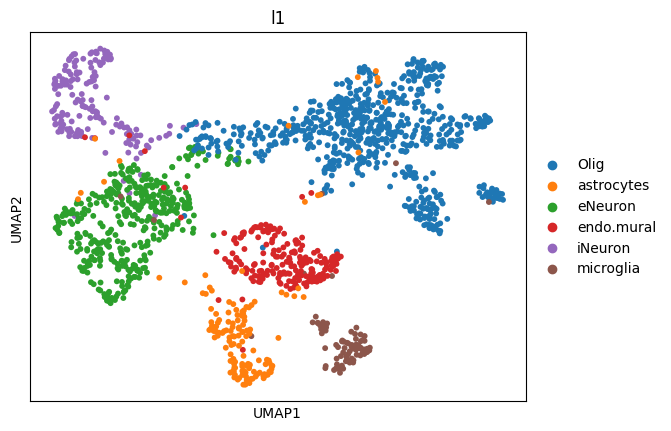

In [22]:
# visualize cell type in sc reference data
sc_reference_path = "../datasets/seqFISH/single/seqFISH_sc.h5ad"
sc_reference_adata = check_anndata(sc_reference_path, True)
sc.pp.normalize_total(sc_reference_adata, target_sum=1e4)
sc.pp.log1p(sc_reference_adata)
sc.pp.neighbors(sc_reference_adata)
sc.tl.umap(sc_reference_adata)
obs_names_df = pd.read_csv(f'{save_path}/proto_type_obs_names_meta.csv', index_col=0)
print(obs_names_df)
sc_reference_adata = sc_reference_adata[obs_names_df['obs_names'], :]
proto_type_list = obs_names_df['proto_type'].tolist()
cell_type_l1_list = []
for pt in proto_type_list:
    cell_type_l1_list.append(pt.split('_')[0])
sc_reference_adata.obs['l1'] = cell_type_l1_list
sc.pl.umap(sc_reference_adata, color='l1', show=True, save=f'umap l1.png')

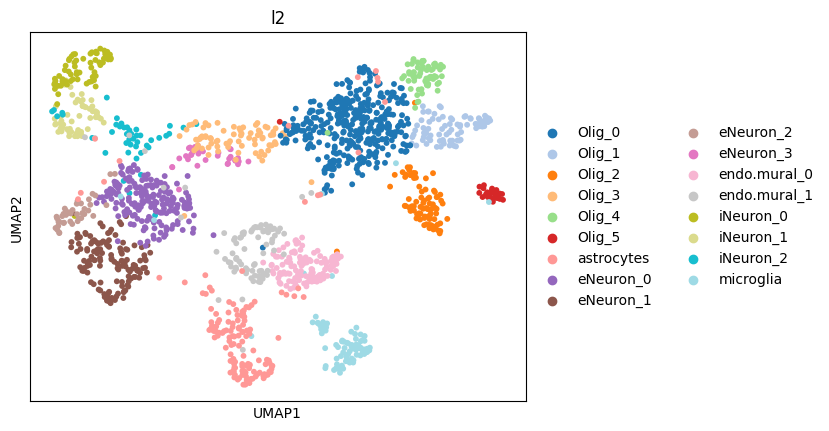

In [27]:
# visualize cell subtype in sc reference data
cell_type_l2_list = []
for pt in proto_type_list:
    total_split = pt.split('_')
    if len(total_split) > 2:
        cell_type_l2_list.append(f"{pt.split('_')[0]}_{pt.split('_')[1]}")
    else:
        cell_type_l2_list.append(pt.split('_')[0])
sc_reference_adata.obs['l2'] = cell_type_l2_list
sc.pl.umap(sc_reference_adata,
           palette='tab20',
           color='l2', show=True, save=f'umap l2.png')